<a href="https://colab.research.google.com/github/LucasAlbFar/analise_dados_hepatite_brasil/blob/main/notebooks/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [318]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
import numpy as np
import statistics

plt.rc('figure', figsize=(20,7))

## **Carregando dados das doses de vacinas aplicadas entre os anos de 1998 e 2020**

In [319]:
url = 'https://raw.githubusercontent.com/LucasAlbFar/analise_dados_hepatite_brasil/main/dados/doses_aplicadas_por_ano_1994_2021.csv'

In [320]:
doses_aplicadas = pd.read_csv(url, encoding="ISO-8859-1", sep=";", thousands='.', decimal=',')
doses_aplicadas = doses_aplicadas.drop(['1994', '1995', '1996', '1997'], axis=1) # removendo coluna dos anos abaixo de 1998

doses_aplicadas['Unidade da Federação'] = [(estado[3:]) for estado in doses_aplicadas['Unidade da Federação']] # renomeando coluna UNIDADE DA FEDEREACAO
doses_aplicadas = doses_aplicadas.set_index('Unidade da Federação')                                            # UF's como indíce

total_doses_por_ano = doses_aplicadas.iloc[-1:].T     # salvando o total por ano 
doses_aplicadas = doses_aplicadas.iloc[:-1 , :] # removendo última linha 

total_doses_por_uf =  doses_aplicadas.iloc[: , -1:]   # salvando total por uf
doses_aplicadas = doses_aplicadas.iloc[: , :-2] # removendo coluna total e ano de 2021

doses_aplicadas = doses_aplicadas.astype(int)
doses_aplicadas

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,284513,242985,206296,292553,168095,144339,128169,163340,150128,130536,158254,152052,142750,156774,145596,139752,157942,158399,129642,99495,92868,92366,71858
Acre,67947,1305380,98465,102509,84525,84971,73776,75675,67871,83924,95347,105503,102222,117360,106904,72409,50955,53746,39248,45873,43463,45925,30880
Amazonas,346619,496898,434945,481011,446048,396598,326329,356846,350897,374693,361393,358219,343181,356573,337960,291348,326899,297631,181756,245458,271990,273327,210123
Roraima,130516,94311,106533,67228,68692,69055,58151,80040,71139,69688,77781,67499,70721,68763,62036,58081,70284,70289,42897,86875,90442,77269,55667
Pará,303487,1565678,801902,1090151,1338385,1298510,834766,796893,746010,753835,717106,655370,661978,707089,714286,705853,568474,444935,267492,432441,389415,407324,331734
Amapá,71395,138089,109414,154072,109364,91928,66098,65280,61688,60916,77572,70762,86950,77110,72390,53680,54348,60370,47575,50889,43991,45813,27905
Tocantins,342615,367434,298045,267479,222614,203614,142491,150169,128696,122637,125628,106307,118082,126214,110612,129179,139990,103585,59184,90441,80323,83442,68392
Maranhão,217434,1752105,1303390,999999,831603,744063,656124,663516,642167,619627,630308,601414,693618,797951,751562,692688,647301,624073,339966,505626,433489,405860,306017
Piauí,4427,187320,273151,360373,282231,656926,405909,322608,277908,287079,233866,238804,242285,313273,272943,270824,250057,180644,106730,160172,145106,155048,128168


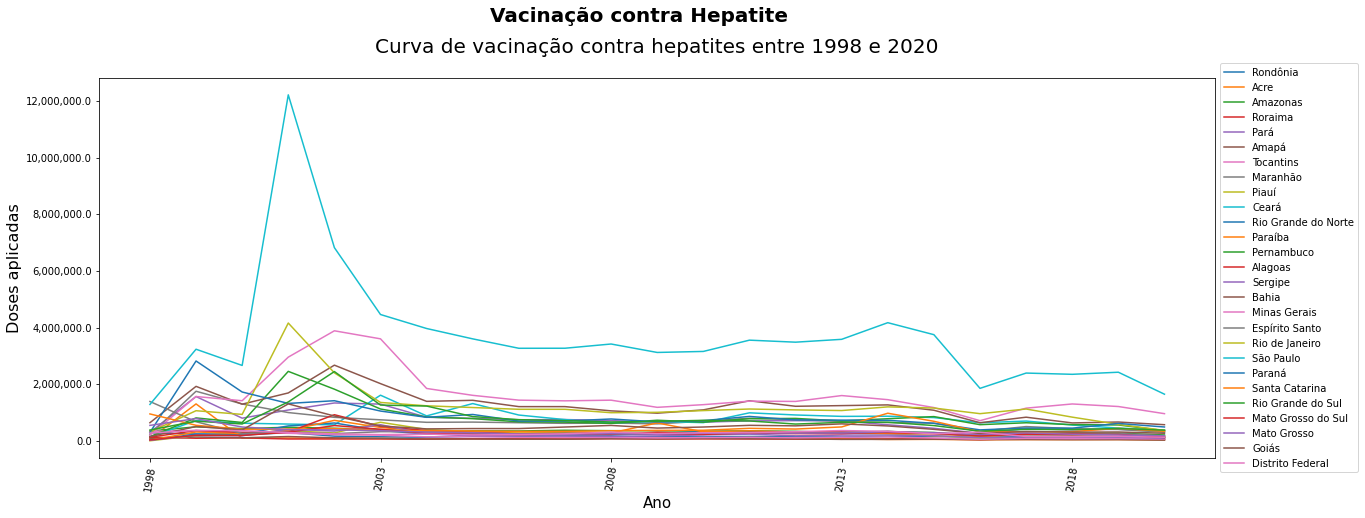

In [321]:
ax = doses_aplicadas.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.suptitle("Vacinação contra Hepatite", size=20, weight='bold' ).set_position([.5, 1.02])
plt.title('Curva de vacinação contra hepatites entre 1998 e 2020',{'fontsize': 20}).set_position([.5, 1.05])

plt.ylabel("Doses aplicadas", size = 16)
plt.xlabel("Ano", size = 15)
plt.xticks(rotation=80)
plt.show()

In [322]:
total_doses_por_ano = total_doses_por_ano.iloc[:-1 , :] # remoção da última linha 'Total'
total_doses_por_ano = total_por_ano.reset_index()
total_doses_por_ano.columns = ['Ano', 'Total']
total_doses_por_ano.set_index('Ano', inplace=True)
total_doses_por_ano

,Total
Ano,
1998,8747762
1999,23190333
2000,16638796
2001,35247081
2002,30965529
2003,24335596
2004,18034244
2005,17202354
2006,15237627


In [323]:
total_doses_por_uf

,Total
Unidade da Federação,
Rondônia,4249402
Acre,3301230
Amazonas,8809287
Roraima,1892744
Pará,17467925
Amapá,1787161
Tocantins,3762221
Maranhão,16008612
Piauí,5795318


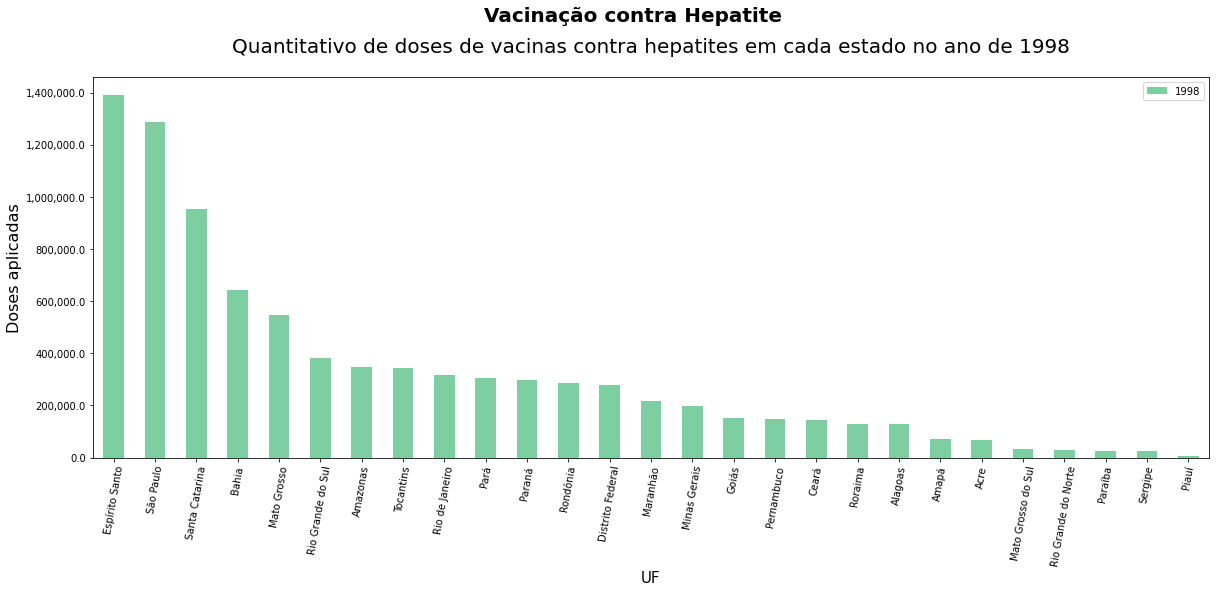

In [324]:
ax = doses_aplicadas.sort_values(by='1998', ascending=False).plot(y='1998', kind='bar',color="#7DCEA0")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.suptitle("Vacinação contra Hepatite", size=20, weight='bold' ).set_position([.5, 1.02])
plt.title('Quantitativo de doses de vacinas contra hepatites em cada estado no ano de 1998', {'fontsize': 20}).set_position([.5, 1.05])

plt.ylabel("Doses aplicadas", size = 16)
plt.xlabel("UF", size = 15)
plt.xticks(rotation=80)
plt.show()

## **Carregando dados dos óbitos por hepatites, entre os anos de 1998 e 2020**

### Dados de 1998 à 2007

In [325]:
url = 'https://raw.githubusercontent.com/LucasAlbFar/analise_dados_hepatite_brasil/main/dados/morbilidade_hospitalar_sus_1995_2007.csv'

In [326]:
obitos_hepatite_1995_2007 = pd.read_csv(url, encoding="ISO-8859-1",skiprows=4, sep=";", skipfooter=1, thousands='.', decimal=',')

obitos_hepatite_1995_2007['Unidade da Federação'] = [(estado[3:]) for estado in obitos_hepatite_1995_2007['Unidade da Federação']] # renomeando coluna UNIDADE DA FEDEREACAO
obitos_hepatite_1995_2007 = obitos_hepatite_1995_2007.set_index('Unidade da Federação')                                            # UF's como indíce

total_obitos_por_ano_1998_2007 = obitos_hepatite_1995_2007.iloc[-1:].T     # salvando o total por ano 
obitos_hepatite_1995_2007 = obitos_hepatite_1995_2007.iloc[:-1 , :] # removendo última linha 
obitos_hepatite_1995_2007 = obitos_hepatite_1995_2007.iloc[:-1 , :] # removendo última linha 

total_obitos_por_uf_1998_2007 =  obitos_hepatite_1995_2007.iloc[: , -1:]   # salvando total por uf
obitos_hepatite_1995_2007 = obitos_hepatite_1995_2007.iloc[: , :-1] # removendo coluna total

obitos_hepatite_1995_2007 = obitos_hepatite_1995_2007.replace('-', 0)
obitos_hepatite_1995_2007 = obitos_hepatite_1995_2007.astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [327]:
url = 'https://raw.githubusercontent.com/LucasAlbFar/analise_dados_hepatite_brasil/main/dados/morbilidade_hospitalar_sus_2008_2021.csv'

In [328]:
obitos_hepatite_2008_2020 = pd.read_csv(url, encoding="ISO-8859-1",skiprows=4, sep=";", skipfooter=6, thousands='.', decimal=',')

obitos_hepatite_2008_2020['Unidade da Federação'] = [(estado[3:]) for estado in obitos_hepatite_2008_2020['Unidade da Federação']] # renomeando coluna UNIDADE DA FEDEREACAO
obitos_hepatite_2008_2020 = obitos_hepatite_2008_2020.set_index('Unidade da Federação')                                            # UF's como indíce

total_obitos_por_ano_2008_2020 = obitos_hepatite_2008_2020.iloc[-1:].T     # salvando o total por ano 
obitos_hepatite_2008_2020 = obitos_hepatite_2008_2020.iloc[:-1 , :] # removendo última linha 

total_obitos_por_uf_2008_2020 =  obitos_hepatite_2008_2020.iloc[: , -1:]   # salvando total por uf
obitos_hepatite_2008_2020 = obitos_hepatite_2008_2020.iloc[: , :-2] # removendo coluna total e do ano 2021

obitos_hepatite_2008_2020 = obitos_hepatite_2008_2020.replace('-', 0)
obitos_hepatite_2008_2020 = obitos_hepatite_2008_2020.astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [329]:
obitos_hepatite = pd.merge(obitos_hepatite_1995_2007, obitos_hepatite_2008_2020, on='Unidade da Federação')
obitos_hepatite

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,9,10,6,13,9,12,5,8,10,8,8,11,8,4,16,14,11,10,11,15,14,17,3
Acre,5,16,15,11,26,22,39,18,27,19,18,22,25,23,20,17,25,17,25,17,24,23,12
Amazonas,13,21,13,15,16,15,21,19,11,8,14,11,20,14,16,16,22,10,24,18,12,18,29
Roraima,2,2,1,2,1,2,1,4,1,1,1,4,4,0,1,0,1,2,1,1,1,2,2
Pará,23,33,26,28,19,30,34,34,22,30,19,19,15,11,19,17,21,17,12,9,15,18,17
Amapá,1,4,0,6,2,0,1,5,0,1,3,4,2,3,3,4,1,2,3,2,1,0,0
Tocantins,0,5,1,2,1,1,4,7,4,6,6,1,6,3,1,3,2,1,1,1,1,0,1
Maranhão,25,24,12,13,22,20,24,26,27,17,10,8,13,23,16,17,15,27,8,10,12,3,3
Piauí,3,7,12,5,8,5,15,12,14,5,7,8,5,7,12,3,9,3,4,7,5,4,3


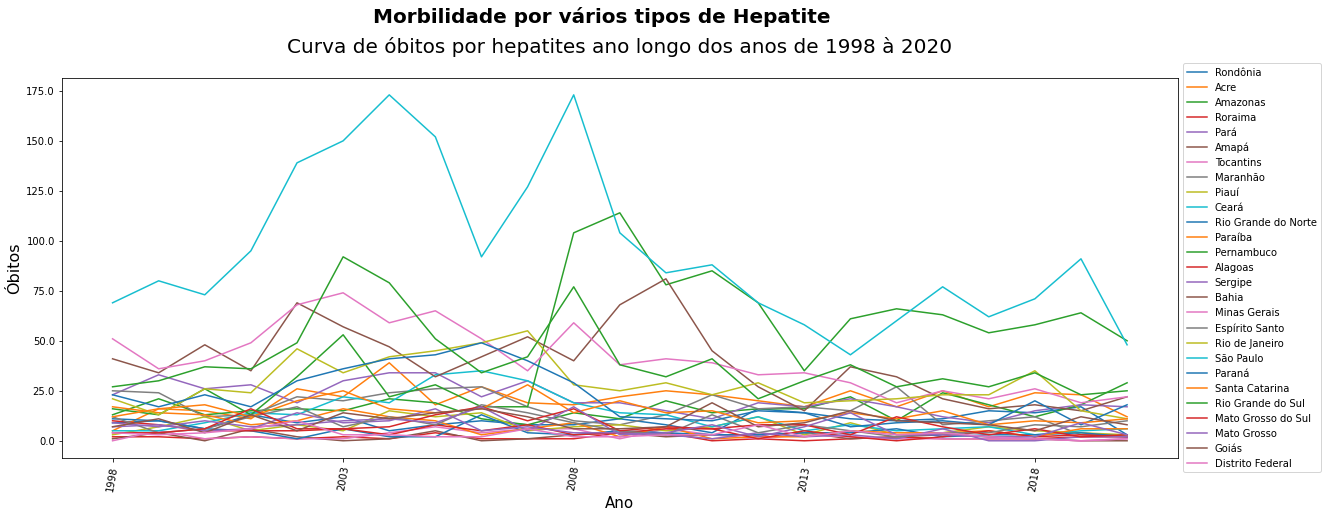

In [333]:
ax = obitos_hepatite.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.suptitle("Morbilidade por vários tipos de Hepatite", size=20, weight='bold' ).set_position([.5, 1.02])
plt.title('Curva de óbitos por hepatites ano longo dos anos de 1998 à 2020',{'fontsize': 20}).set_position([.5, 1.05])

plt.ylabel("Óbitos", size = 16)
plt.xlabel("Ano", size = 15)
plt.xticks(rotation=80)
plt.show()

In [330]:
total_obitos_por_ano_1998_2007 = total_obitos_por_ano_1998_2007.iloc[:-1 , :] # remoção da última linha 'Total'
total_obitos_por_ano_1998_2007 = total_obitos_por_ano_1998_2007.reset_index()
total_obitos_por_ano_1998_2007.columns = ['Ano', 'Total']
total_obitos_por_ano_1998_2007.set_index('Ano', inplace=True)
total_obitos_por_ano_2008_2020 = total_obitos_por_ano_2008_2020.iloc[:-1 , :] # remoção da última linha 'Total'
total_obitos_por_ano_2008_2020 = total_obitos_por_ano_2008_2020.iloc[:-1 , :] # remoção da última linha 2021
total_obitos_por_ano_2008_2020 = total_obitos_por_ano_2008_2020.reset_index()
total_obitos_por_ano_2008_2020.columns = ['Ano', 'Total']
total_obitos_por_ano_2008_2020.set_index('Ano', inplace=True)
total_obitos_por_ano_2008_2020
total_obitos_por_ano = pd.concat([total_obitos_por_ano_1998_2007, total_obitos_por_ano_2008_2020])
total_obitos_por_ano

,Total
Ano,
1998,435
1999,435
2000,445
2001,468
2002,646
2003,727
2004,713
2005,678
2006,597


In [331]:
total_por_uf = total_obitos_por_uf_1998_2007 + total_obitos_por_uf_2008_2020
total_por_uf

,Total
Unidade da Federação,
Rondônia,234
Acre,468
Amazonas,382
Roraima,38
Pará,490
Amapá,48
Tocantins,58
Maranhão,375
Piauí,164
